In [1]:
import warnings

# Data manipulations
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import set_option
from numpy import set_printoptions

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

from dateutil.parser import parse
from datetime import datetime

# feature selection
from sklearn.feature_selection import SelectKBest, chi2

# preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# data balancing
from imblearn.combine import SMOTEENN

# modeling
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

# Algorithms and Prediction
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV


# Evaluation
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score, mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree, export_text

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# hypertunning 
from sklearn import metrics

# cross validation
import statsmodels.api as sim

warnings.filterwarnings('ignore')

label_encoder = LabelEncoder()

In [15]:
# Import the data 
filepath = 'C:/Users/ukwun/OneDrive - Brandon University/Documents/Analysis Transcriptome/'
filename = 'Soybean Transcriptomics_RNA.samples_FinalAA.csv'
data = pd.read_csv(filepath + filename)

In [16]:
data.columns

Index(['#', 'Name', 'ID for Seq', 'Concentration (ng/ul) ', 'A260/A280',
       'A260/A230', 'Unnamed: 6'],
      dtype='object')

In [17]:
data.head()

,#,Name,ID for Seq,Concentration (ng/ul),A260/A280,A260/A230,Unnamed: 6
0,1.0,Control.1dpi.R1,SBAL_1,412.8,2.218,2.387,NaN
1,2.0,Control.1dpi.R2,SBAL_2,430.4,2.216,2.390,NaN
2,3.0,Control.1dpi.R3,SBAL_3,781.9,2.274,2.486,NaN
3,4.0,Control.1dpi.R4,SBAL_4,773.0,2.249,2.456,NaN
4,5.0,Control.7dpi.R2,SBAL_5,272.3,2.189,2.357,NaN


In [18]:
data.columns.to_series().groupby(data.dtypes).groups

{float64: ['#', 'Concentration (ng/ul) ', 'A260/A280', 'A260/A230', 'Unnamed: 6'], object: ['Name', 'ID for Seq']}

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   #                       24 non-null     float64
 1   Name                    24 non-null     object 
 2   ID for Seq              24 non-null     object 
 3   Concentration (ng/ul)   24 non-null     float64
 4   A260/A280               24 non-null     float64
 5   A260/A230               24 non-null     float64
 6   Unnamed: 6              0 non-null      float64
dtypes: float64(5), object(2)
memory usage: 2.4+ KB


In [20]:
data.isna().sum()

#                         17
Name                      17
ID for Seq                17
Concentration (ng/ul)     17
A260/A280                 17
A260/A230                 17
Unnamed: 6                41
dtype: int64

In [21]:
data.isnull().sum()

#                         17
Name                      17
ID for Seq                17
Concentration (ng/ul)     17
A260/A280                 17
A260/A230                 17
Unnamed: 6                41
dtype: int64

In [22]:
# Function to calculate missing values by column

def missing_values_table(data):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [23]:
missing_values_table(data)

Your selected dataframe has 7 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Unnamed: 6,41,100.0
#,17,41.5
Name,17,41.5
ID for Seq,17,41.5
Concentration (ng/ul),17,41.5
A260/A280,17,41.5
A260/A230,17,41.5


In [37]:
mapping = data.loc[data['ID for Seq']=='SBAL_1', 'Test_sample'] = 'Control_D1'
mapping = data.loc[data['ID for Seq']=='SBAL_2', 'Test_sample'] = 'Control_D1'
mapping = data.loc[data['ID for Seq']=='SBAL_3', 'Test_sample'] = 'Control_D1'
mapping = data.loc[data['ID for Seq']=='SBAL_4', 'Test_sample'] = 'Control_D1'

In [39]:
mapping = data.loc[data['ID for Seq']=='SBAL_5', 'Test_sample'] = 'Control_D7'
mapping = data.loc[data['ID for Seq']=='SBAL_6', 'Test_sample'] = 'Control_D7'
mapping = data.loc[data['ID for Seq']=='SBAL_7', 'Test_sample'] = 'Control_D7'
mapping = data.loc[data['ID for Seq']=='SBAL_8', 'Test_sample'] = 'Control_D7'

In [40]:
mapping = data.loc[data['ID for Seq']=='SBAL_9', 'Test_sample'] = 'Control_D14'
mapping = data.loc[data['ID for Seq']=='SBAL_10', 'Test_sample'] = 'Control_D14'
mapping = data.loc[data['ID for Seq']=='SBAL_11', 'Test_sample'] = 'Control_D14'
mapping = data.loc[data['ID for Seq']=='SBAL_12', 'Test_sample'] = 'Control_D14'

In [41]:
mapping = data.loc[data['ID for Seq']=='SBAL_13', 'Test_sample'] = 'Alternaria_D1'
mapping = data.loc[data['ID for Seq']=='SBAL_14', 'Test_sample'] = 'Alternaria_D1'
mapping = data.loc[data['ID for Seq']=='SBAL_15', 'Test_sample'] = 'Alternaria_D1'
mapping = data.loc[data['ID for Seq']=='SBAL_16', 'Test_sample'] = 'Alternaria_D1'

In [42]:
mapping = data.loc[data['ID for Seq']=='SBAL_17', 'Test_sample'] = 'Alternaria_D7'
mapping = data.loc[data['ID for Seq']=='SBAL_18', 'Test_sample'] = 'Alternaria_D7'
mapping = data.loc[data['ID for Seq']=='SBAL_19', 'Test_sample'] = 'Alternaria_D7'
mapping = data.loc[data['ID for Seq']=='SBAL_20', 'Test_sample'] = 'Alternaria_D7'

In [43]:
mapping = data.loc[data['ID for Seq']=='SBAL_21', 'Test_sample'] = 'Alternaria_D14'
mapping = data.loc[data['ID for Seq']=='SBAL_22', 'Test_sample'] = 'Alternaria_D14'
mapping = data.loc[data['ID for Seq']=='SBAL_23', 'Test_sample'] = 'Alternaria_D14'
mapping = data.loc[data['ID for Seq']=='SBAL_24', 'Test_sample'] = 'Alternaria_D14'

In [44]:
data.head()

,#,Name,ID for Seq,Concentration (ng/ul),A260/A280,A260/A230,Unnamed: 6,ID Seq Num,IDSeqNum,Test_sample
0,1.0,Control.1dpi.R1,SBAL_1,412.8,2.218,2.387,NaN,Control D1,Control D1,Control_D1
1,2.0,Control.1dpi.R2,SBAL_2,430.4,2.216,2.390,NaN,Control D1,Control D1,Control_D1
2,3.0,Control.1dpi.R3,SBAL_3,781.9,2.274,2.486,NaN,Control D1,Control D1,Control_D1
3,4.0,Control.1dpi.R4,SBAL_4,773.0,2.249,2.456,NaN,Control D1,Control D1,Control_D1
4,5.0,Control.7dpi.R2,SBAL_5,272.3,2.189,2.357,NaN,Control D7,Control D7,Control_D7


In [45]:
data.tail()

,#,Name,ID for Seq,Concentration (ng/ul),A260/A280,A260/A230,Unnamed: 6,ID Seq Num,IDSeqNum,Test_sample
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
data

,#,Name,ID for Seq,Concentration (ng/ul),A260/A280,A260/A230,Unnamed: 6,ID Seq Num,IDSeqNum,Test_sample
0,1.0,Control.1dpi.R1,SBAL_1,412.8,2.218,2.387,NaN,Control D1,Control D1,Control_D1
1,2.0,Control.1dpi.R2,SBAL_2,430.4,2.216,2.390,NaN,Control D1,Control D1,Control_D1
2,3.0,Control.1dpi.R3,SBAL_3,781.9,2.274,2.486,NaN,Control D1,Control D1,Control_D1
3,4.0,Control.1dpi.R4,SBAL_4,773.0,2.249,2.456,NaN,Control D1,Control D1,Control_D1
4,5.0,Control.7dpi.R2,SBAL_5,272.3,2.189,2.357,NaN,Control D7,Control D7,Control_D7
5,6.0,Control.7dpi.R3,SBAL_6,227.2,2.153,2.141,NaN,Control D7,Control D7,Control_D7
6,7.0,Control.7dpi.R4,SBAL_7,358.7,2.196,2.395,NaN,Control D7,Control D7,Control_D7
7,8.0,Control.7dpi.R5,SBAL_8,230.4,2.158,2.273,NaN,Control D7,Control D7,Control_D7
8,9.0,Control.14dpi.R1.2,SBAL_9,85.1,2.127,2.108,NaN,Control D14,Control D14,Control_D14
9,10.0,Control.14dpi.R2.1,SBAL_10,97.0,2.129,2.053,NaN,Control D14,Control D14,Control_D14


In [47]:
test_data = data.drop(['#','Unnamed: 6','ID Seq Num','IDSeqNum'],axis=1,inplace=True)

In [50]:
test_data = data.dropna(how='all')

In [51]:
test_data

,Name,ID for Seq,Concentration (ng/ul),A260/A280,A260/A230,Test_sample
0,Control.1dpi.R1,SBAL_1,412.8,2.218,2.387,Control_D1
1,Control.1dpi.R2,SBAL_2,430.4,2.216,2.390,Control_D1
2,Control.1dpi.R3,SBAL_3,781.9,2.274,2.486,Control_D1
3,Control.1dpi.R4,SBAL_4,773.0,2.249,2.456,Control_D1
4,Control.7dpi.R2,SBAL_5,272.3,2.189,2.357,Control_D7
5,Control.7dpi.R3,SBAL_6,227.2,2.153,2.141,Control_D7
6,Control.7dpi.R4,SBAL_7,358.7,2.196,2.395,Control_D7
7,Control.7dpi.R5,SBAL_8,230.4,2.158,2.273,Control_D7
8,Control.14dpi.R1.2,SBAL_9,85.1,2.127,2.108,Control_D14
9,Control.14dpi.R2.1,SBAL_10,97.0,2.129,2.053,Control_D14


In [63]:
options = ['Control_D1','Control_D7','Control_D14','Alternaria_D1','Alternaria_D7','Alternaria_D14']

In [64]:
testSamle = test_data[test_data['Test_sample']. isin (options)]

In [65]:
testSamle

,Name,ID for Seq,Concentration (ng/ul),A260/A280,A260/A230,Test_sample
0,Control.1dpi.R1,SBAL_1,412.8,2.218,2.387,Control_D1
1,Control.1dpi.R2,SBAL_2,430.4,2.216,2.390,Control_D1
2,Control.1dpi.R3,SBAL_3,781.9,2.274,2.486,Control_D1
3,Control.1dpi.R4,SBAL_4,773.0,2.249,2.456,Control_D1
4,Control.7dpi.R2,SBAL_5,272.3,2.189,2.357,Control_D7
5,Control.7dpi.R3,SBAL_6,227.2,2.153,2.141,Control_D7
6,Control.7dpi.R4,SBAL_7,358.7,2.196,2.395,Control_D7
7,Control.7dpi.R5,SBAL_8,230.4,2.158,2.273,Control_D7
8,Control.14dpi.R1.2,SBAL_9,85.1,2.127,2.108,Control_D14
9,Control.14dpi.R2.1,SBAL_10,97.0,2.129,2.053,Control_D14


Test_sample
Control_D1        4
Control_D7        4
Control_D14       4
Alternaria_D1     4
Alternaria_D7     4
Alternaria_D14    4
Name: count, dtype: int64


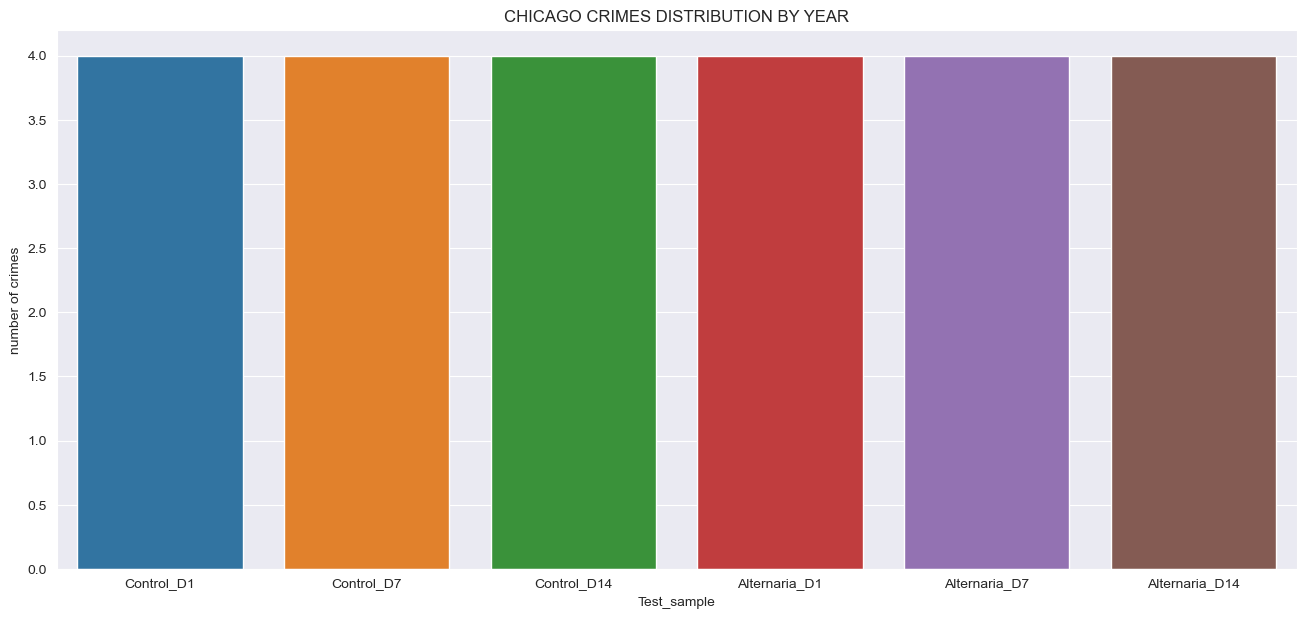

In [66]:
print(testSamle['Test_sample'].value_counts())
plt.figure(figsize = (16, 7))
sns.countplot(x = 'Test_sample', data = testSamle)
plt.ylabel('number of crimes')
plt.title('CHICAGO CRIMES DISTRIBUTION BY YEAR')
plt.show()

In [69]:
testSamle_1 = testSamle.rename(columns={'Concentration (ng/ul)':'Concentration'})

In [70]:
testSamle_1

,Name,ID for Seq,Concentration (ng/ul),A260/A280,A260/A230,Test_sample
0,Control.1dpi.R1,SBAL_1,412.8,2.218,2.387,Control_D1
1,Control.1dpi.R2,SBAL_2,430.4,2.216,2.390,Control_D1
2,Control.1dpi.R3,SBAL_3,781.9,2.274,2.486,Control_D1
3,Control.1dpi.R4,SBAL_4,773.0,2.249,2.456,Control_D1
4,Control.7dpi.R2,SBAL_5,272.3,2.189,2.357,Control_D7
5,Control.7dpi.R3,SBAL_6,227.2,2.153,2.141,Control_D7
6,Control.7dpi.R4,SBAL_7,358.7,2.196,2.395,Control_D7
7,Control.7dpi.R5,SBAL_8,230.4,2.158,2.273,Control_D7
8,Control.14dpi.R1.2,SBAL_9,85.1,2.127,2.108,Control_D14
9,Control.14dpi.R2.1,SBAL_10,97.0,2.129,2.053,Control_D14


ID for Seq
SBAL_1     1
SBAL_2     1
SBAL_23    1
SBAL_22    1
SBAL_21    1
SBAL_20    1
SBAL_19    1
SBAL_18    1
SBAL_17    1
SBAL_16    1
SBAL_15    1
SBAL_14    1
SBAL_13    1
SBAL_12    1
SBAL_11    1
SBAL_10    1
SBAL_9     1
SBAL_8     1
SBAL_7     1
SBAL_6     1
SBAL_5     1
SBAL_4     1
SBAL_3     1
SBAL_24    1
Name: count, dtype: int64


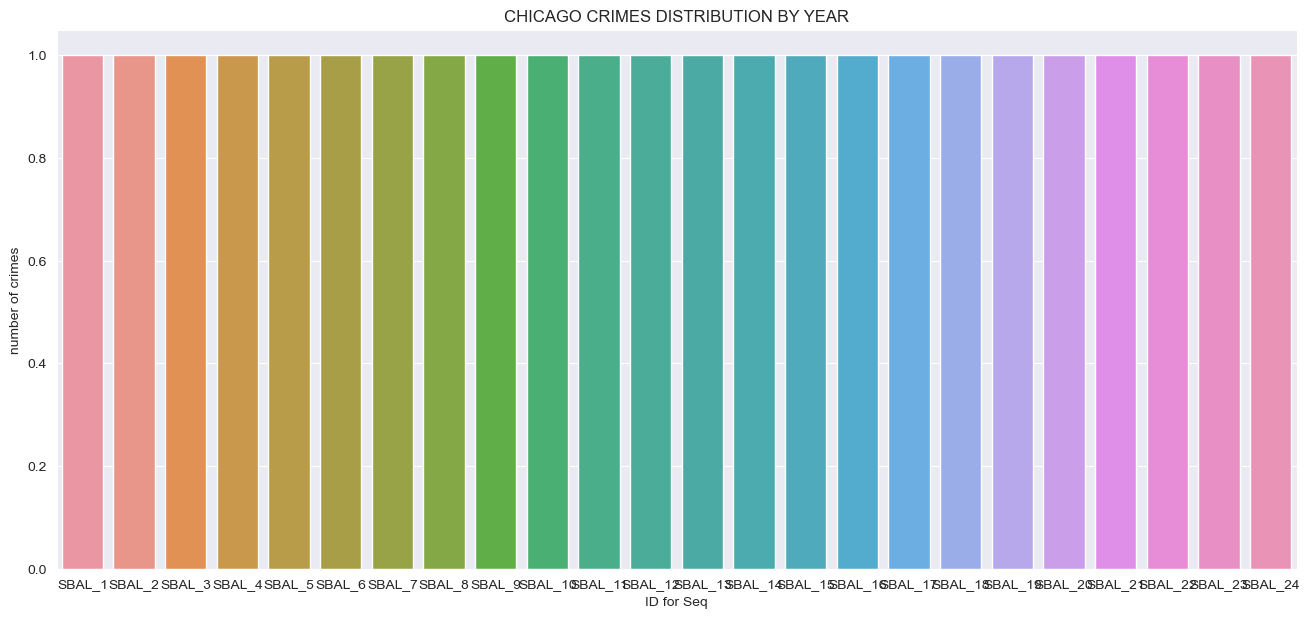

In [89]:
print(testSamle['ID for Seq'].value_counts())
plt.figure(figsize = (16, 7))
sns.countplot(x = 'ID for Seq', data = testSamle)
plt.ylabel('number of crimes')
plt.title('CHICAGO CRIMES DISTRIBUTION BY YEAR')
plt.show()

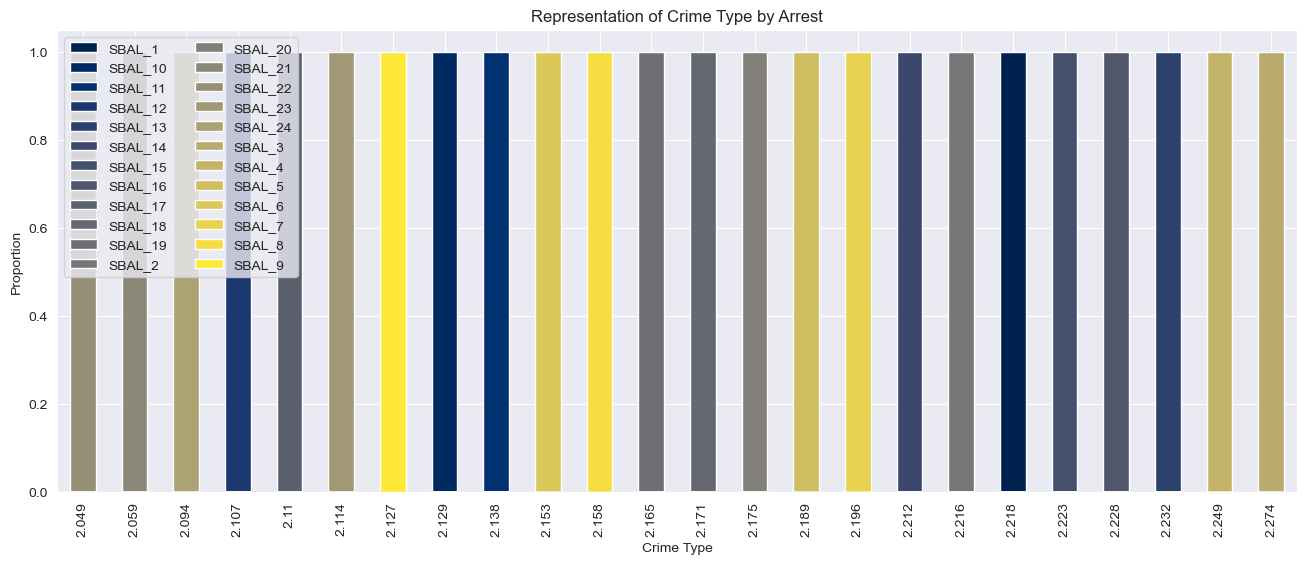

In [90]:
cross_tab = pd.crosstab(index=data['ID for Seq'], columns=data['A260/A280'])
cross_tab.T.plot(kind='bar', stacked=True, colormap='cividis', figsize=(16, 6))
sns.set_style("darkgrid")
plt.xticks(rotation=90)
plt.legend(loc="upper left", ncol=2, )
plt.title('Representation of Crime Type by Arrest')
plt.xlabel("Crime Type")
plt.ylabel("Proportion");

A260/A280
2.218    1
2.216    1
2.114    1
2.049    1
2.059    1
2.175    1
2.165    1
2.171    1
2.110    1
2.228    1
2.223    1
2.212    1
2.232    1
2.107    1
2.138    1
2.129    1
2.127    1
2.158    1
2.196    1
2.153    1
2.189    1
2.249    1
2.274    1
2.094    1
Name: count, dtype: int64


<Axes: title={'center': 'Amount of Crimes by Primary Type'}, ylabel='A260/A280'>

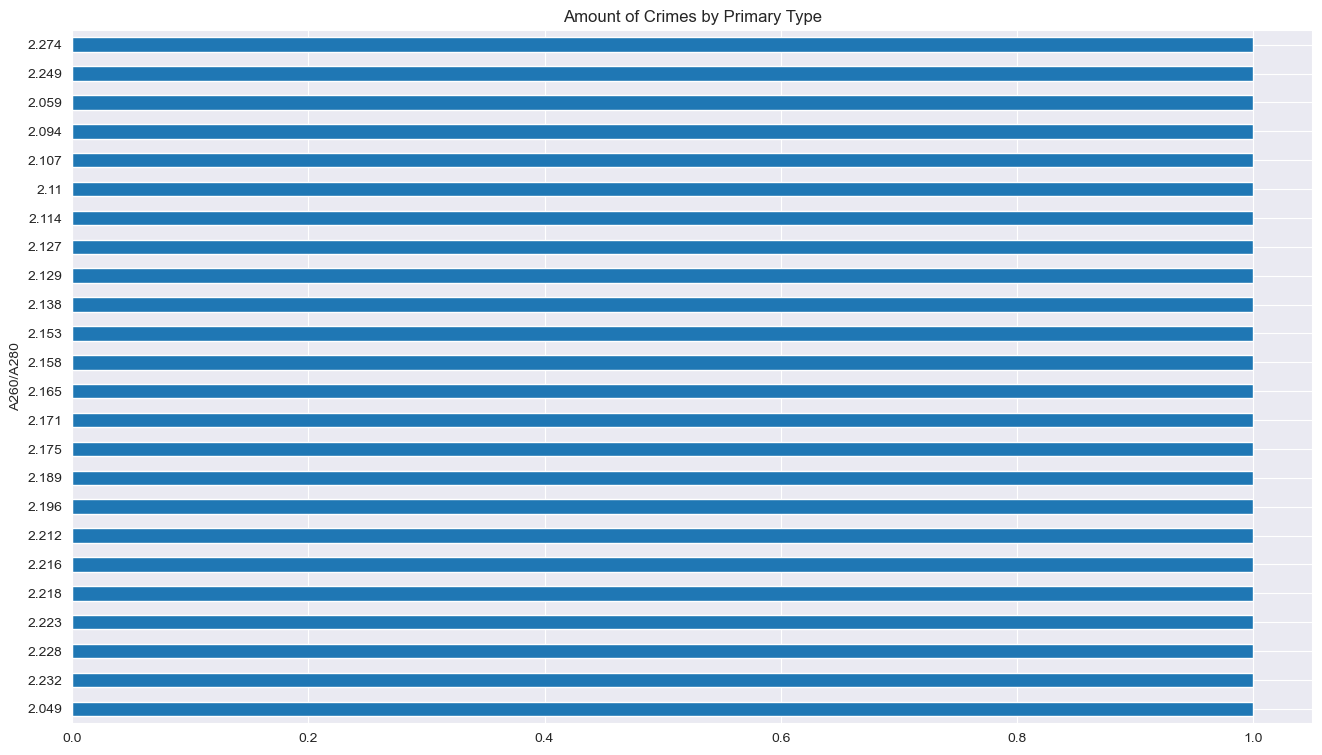

In [73]:
print(testSamle_1['A260/A280'].value_counts())
plt.figure(figsize=(16,9))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')
data.groupby(testSamle_1['A260/A280']).size().sort_values(ascending=True).plot(kind='barh')

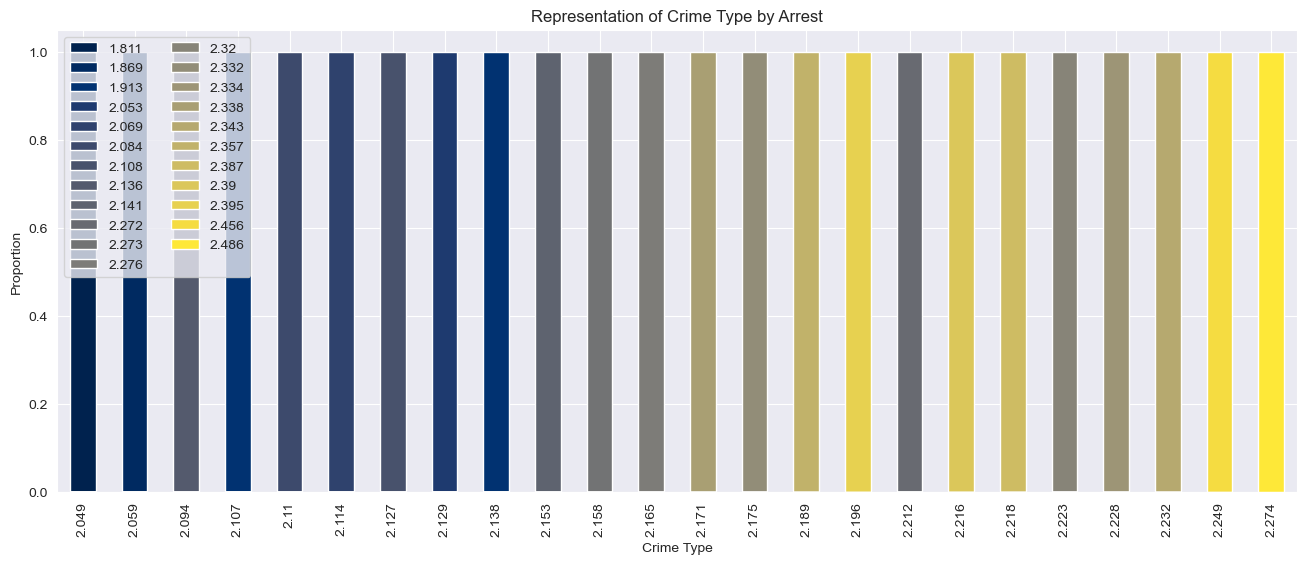

In [79]:
cross_tab = pd.crosstab(index=data['A260/A230'], columns=data['A260/A280'])
cross_tab.T.plot(kind='bar', stacked=True, colormap='cividis', figsize=(16, 6))
sns.set_style("darkgrid")
plt.xticks(rotation=90)
plt.legend(loc="upper left", ncol=2, )
plt.title('Representation of Crime Type by Arrest')
plt.xlabel("Crime Type")
plt.ylabel("Proportion");

# This is a replica of what I'm trying to achieve

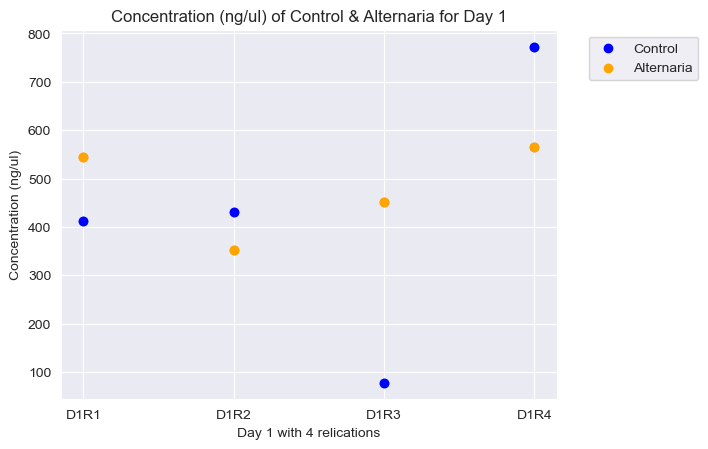

In [87]:
A = ['D1R1', 'D1R2', 'D1R3', 'D1R4']
B = [412.8, 430.4, 78.19, 773.0]
C = [544.0, 352.8, 452.4, 565.3]
plt.scatter(A,B)
plt.scatter(A,C)
plt.scatter(A,B, color='blue', label='Control');
plt.scatter(A,C, color='orange', label ='Alternaria');
plt.title('Concentration (ng/ul) of Control & Alternaria for Day 1')
plt.xlabel('Day 1 with 4 relications')
plt.ylabel('Concentration (ng/ul)')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')

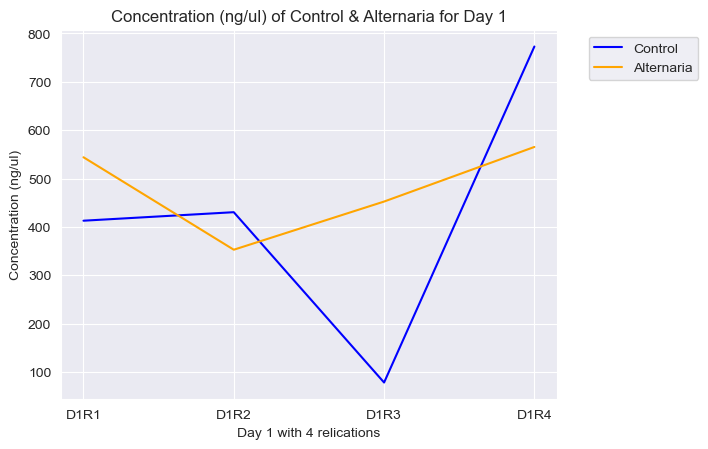

In [98]:
A = ['D1R1', 'D1R2', 'D1R3', 'D1R4']
B = [412.8, 430.4, 78.19, 773.0]
C = [544.0, 352.8, 452.4, 565.3]

plt.plot(A,B, color='blue', label='Control');
plt.plot(A,C, color='orange', label ='Alternaria');
plt.title('Concentration (ng/ul) of Control & Alternaria for Day 1')
plt.xlabel('Day 1 with 4 relications')
plt.ylabel('Concentration (ng/ul)')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')